<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_16_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

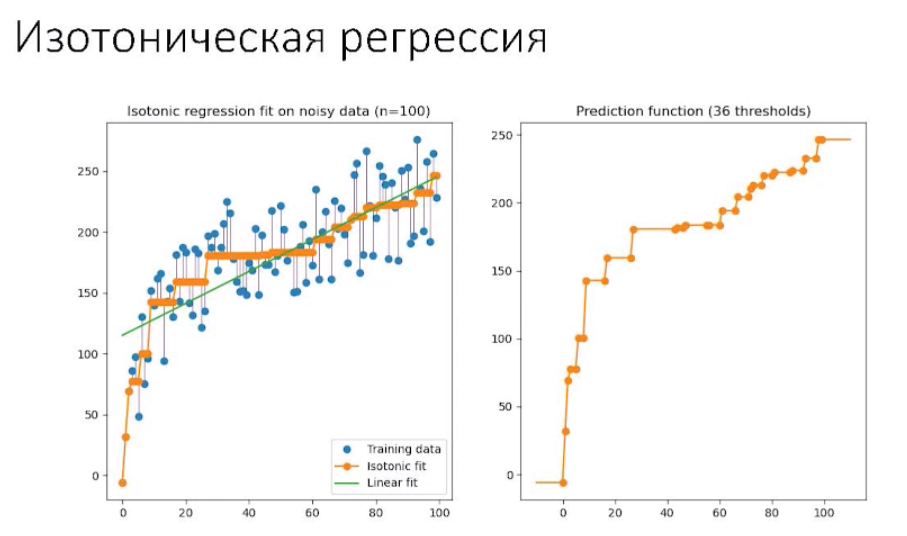

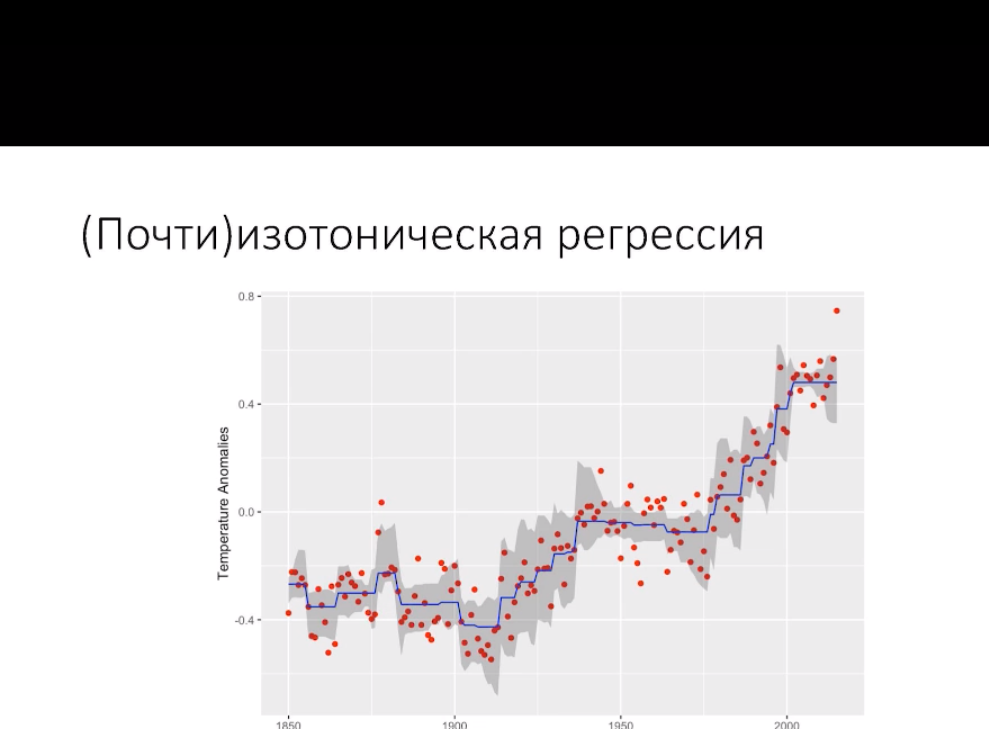

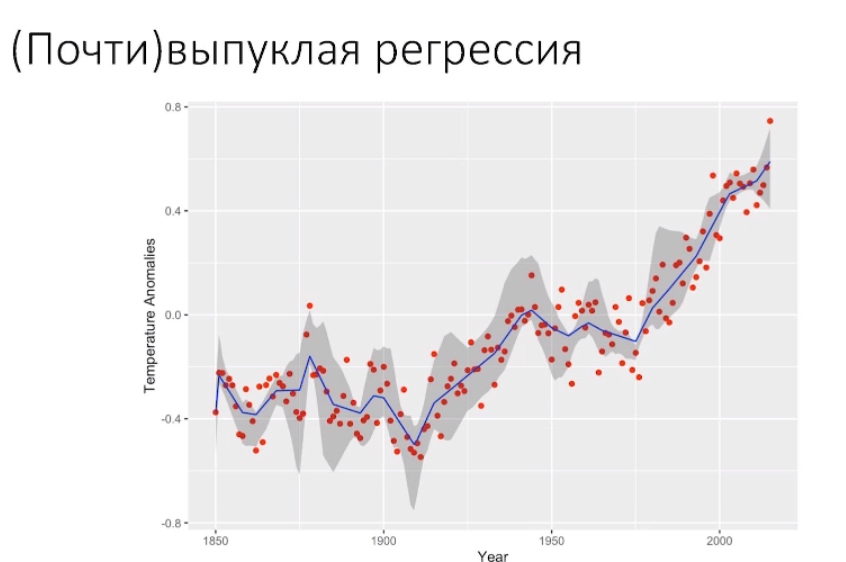

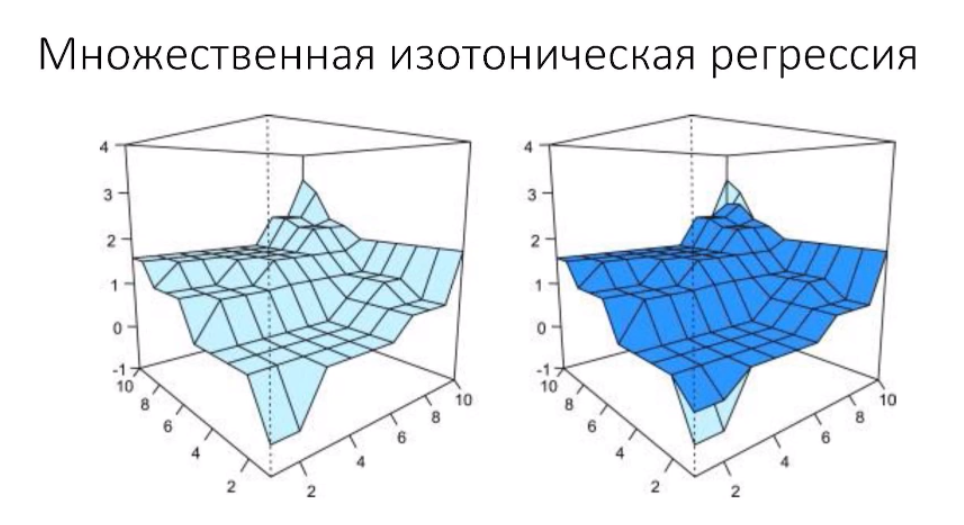

**Изотоническая регресия**


In [2]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import numpy as np
import pandas as pd
#import optuna
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,ElasticNet
#from scipy.stats import uniform
from sklearn.metrics import mean_squared_log_error
import sklearn
#from sklearn.model_selection import RandomizedSearchCV

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')
data.head()

,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,air_temperature1,wind_direction_sin,wind_direction_cos,hour
0,2016-01-30 08:00:00,43.6839,8.3,0.0,6.1,0.0,1019.0,2.1,-2.3,-0.642788,-0.766044,8
1,2016-01-31 05:00:00,37.5408,12.8,0.0,10.0,0.0,1021.9,0.0,-1.1,0.000000,1.000000,5
2,2016-01-31 17:00:00,52.5571,20.6,0.0,11.7,0.0,1020.9,1.5,1.7,0.939693,-0.342020,17
3,2016-04-08 14:00:00,59.3827,21.7,2.0,14.4,0.0,1015.1,3.1,2.8,-0.939693,-0.342020,14
4,2016-05-01 19:00:00,448.0000,31.1,0.0,17.2,0.0,1016.1,4.1,1.1,0.984808,-0.173648,19


In [5]:
# функция ошибки RMSLE
def rmsle_err(y, y_pred):
  return ((np.log(1 + y) - np.log(1 + y_pred))**2).mean()**0.5


In [6]:
x = np.array(data['air_temperature']).reshape(-1,1)
y = data['meter_reading']
model = LinearRegression().fit(x, y)
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model.predict(x))))
#print("Коэффициенты: ", model.coef_, model.intercept_)

RMSLE: 0.2228


In [7]:
model_is = IsotonicRegression().fit(x,y)
model_is

IsotonicRegression()

In [8]:
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model.predict(x))))
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model_is.predict(x))))

RMSLE: 0.2228
RMSLE: 0.21622


**Практикум для самостояльной работы**

1.Дайте определение изотонической регрессии.

Изотонические регрессии или монотонная регрессия является методом подгонки свободной формы линии к последовательности наблюдений таким образом, что встроенная линия не убывает (или не возрастает) всюду, и ложь как можно ближе к наблюдениям , как это возможно.

Изотоническая регрессия основана на предположении, что если один признак изменяется, то другие признаки также могут изменяться, чтобы сохранить общую изотонию (равновесие) системы. Например, если температура тела повышается, то частота сердечных сокращений может увеличиться, чтобы поддерживать постоянную температуру тела.

Этот метод может быть использован для анализа данных, полученных из экспериментов или наблюдений, и помогает понять, как различные факторы влияют на исследуемый признак.

2.Назовите преимущество изотонической регрессии.

в медицине:
Преимущество изотонической регрессии заключается в том, что она позволяет предсказывать экспрессию генов на основе анализа регуляторных элементов, не требуя знания структуры белка или функции гена. Это делает изотоническую регрессию мощным инструментом в исследованиях экспрессии генов, особенно в случаях, когда информация о белках или функциях генов неполная или отсутствует.ь
Ну и
Преимуществом изотонической регрессии является то, что она не ограничивается какой-либо функциональной формой, такой как линейность, обусловленная линейной регрессией.


3. Задание спикера

In [9]:
x = np.array(data['air_temperature']).reshape(-1,1)
y = data['meter_reading']
model = LinearRegression().fit(x, y)
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model.predict(x))))
#print("Коэффициенты: ", model.coef_, model.intercept_)

RMSLE: 0.2228


In [10]:
ensamble = []
for h in range(24):
  data1 =  data.loc[data['hour'] == h]
  #Scaler = MinMaxScaler().fit_transform(data1[["air_temperature","sea_level_pressure"]])
  #df = pd.DataFrame(scaler)
  #df[1] = df[1].interpolate()
  #data_norm1 = df.to_numpy()
  #x = data_norm
  #x = data_norm
  x = np.array(data1['air_temperature']).reshape(-1,1)
  y = data1['meter_reading']
  model_is1 = IsotonicRegression().fit(x,y)
  ensamble.append(model_is1)
print(ensamble)

[IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression(), IsotonicRegression()]


In [13]:
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model.predict(x))))
print ('RMSLE: {0:.5}'. format(rmsle_err(y, model_is1.predict(x))))

RMSLE: 0.22063
RMSLE: 0.20216
